# Notebook for the figures in the paper Molnar et al, High - frequency waves in the chromosphere, 2020

In [3]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from power_uncertain import * #function name for evaluating the uncertainties in the power spectra is power_uncertain
import scipy as sp
import scipy.io as io
from matplotlib import rc
from mfgs import mfgs
from astropy.io import fits

from RHlib import *

In [2]:
#Define all the functions for plotting used later 

def plot_power_spectra(spectrum,frequency,legend1):
    #basic function for plotting power spectrum
    #uncertainties = (power_uncertain(spectrum))[0]
    #for i in range(0,(uncertainties.__len__())): 
     #   if np.isnan(uncertainties[i]):
      #      uncertainties[i]= 0.7
    #plt.errorbar(frequency,spectrum,yerr=uncertainties*spectrum,fmt='.k',capsize=1,elinewidth=0.3,markersize=0)
    plt.plot(frequency,spectrum,'--o',label=legend1,linewidth=1)
    plt.ylabel("Power, km$^2$/s$^2$/Hz",fontsize=12)
    plt.xlabel("Frequency, mHz",fontsize=12)
    plt.yscale("log")
    plt.grid()
    plt.xscale("log")

def power_spec(data,time_step):
    ps    = np.abs(np.fft.fft(data))**2
    freqs = np.fft.fftfreq(data.size, time_step)
    idx   = np.argsort(freqs)
    return data[idx],freqs[idx]


In [9]:
#load all the central data here 

dir_data       = '/Users/molnarad/CU_Boulder/Work/Chromospheric_business/Comps_2/comps_data/'
dir_fig         = '/Users/molnarad/CU_Boulder/Work/Chromospheric_business/Comps_2/comps_code/comps_paper/Figures/'
IBIS_data_dir   = dir_data + 'IBIS/'
Hinode_Data_dir = dir_data + 'Hinode/'

[0.         0.00280129 0.00560258 0.00840388 0.01120517 0.01400646
 0.01680775 0.01960905 0.02241034 0.02521163 0.02801292 0.03081422
 0.03361551 0.0364168  0.03921809 0.04201938 0.04482068 0.04762197
 0.05042326 0.05322455 0.05602584 0.05882714 0.06162843 0.06442972
 0.06723101 0.0700323  0.0728336  0.0756349  0.07843618 0.08123748
 0.08403876 0.08684006 0.08964135 0.09244265 0.09524394 0.09804522
 0.10084652 0.10364781 0.1064491  0.1092504  0.11205168 0.11485298
 0.11765428 0.12045556 0.12325686 0.12605816 0.12885945 0.13166074
 0.13446203 0.13726331]
[0.         0.00181571 0.00363142 0.00544714 0.00726285 0.00907856
 0.01089427 0.01270998 0.0145257  0.01634141 0.01815712 0.01997283
 0.02178854 0.02360426 0.02541997 0.02723568 0.02905139 0.0308671
 0.03268281 0.03449853 0.03631424 0.03812995 0.03994566 0.04176137
 0.04357709 0.0453928  0.04720851 0.04902422 0.05083993 0.05265565
 0.05447136 0.05628707 0.05810279 0.05991849 0.06173421 0.06354992
 0.06536563 0.06718134 0.06899706 0.070

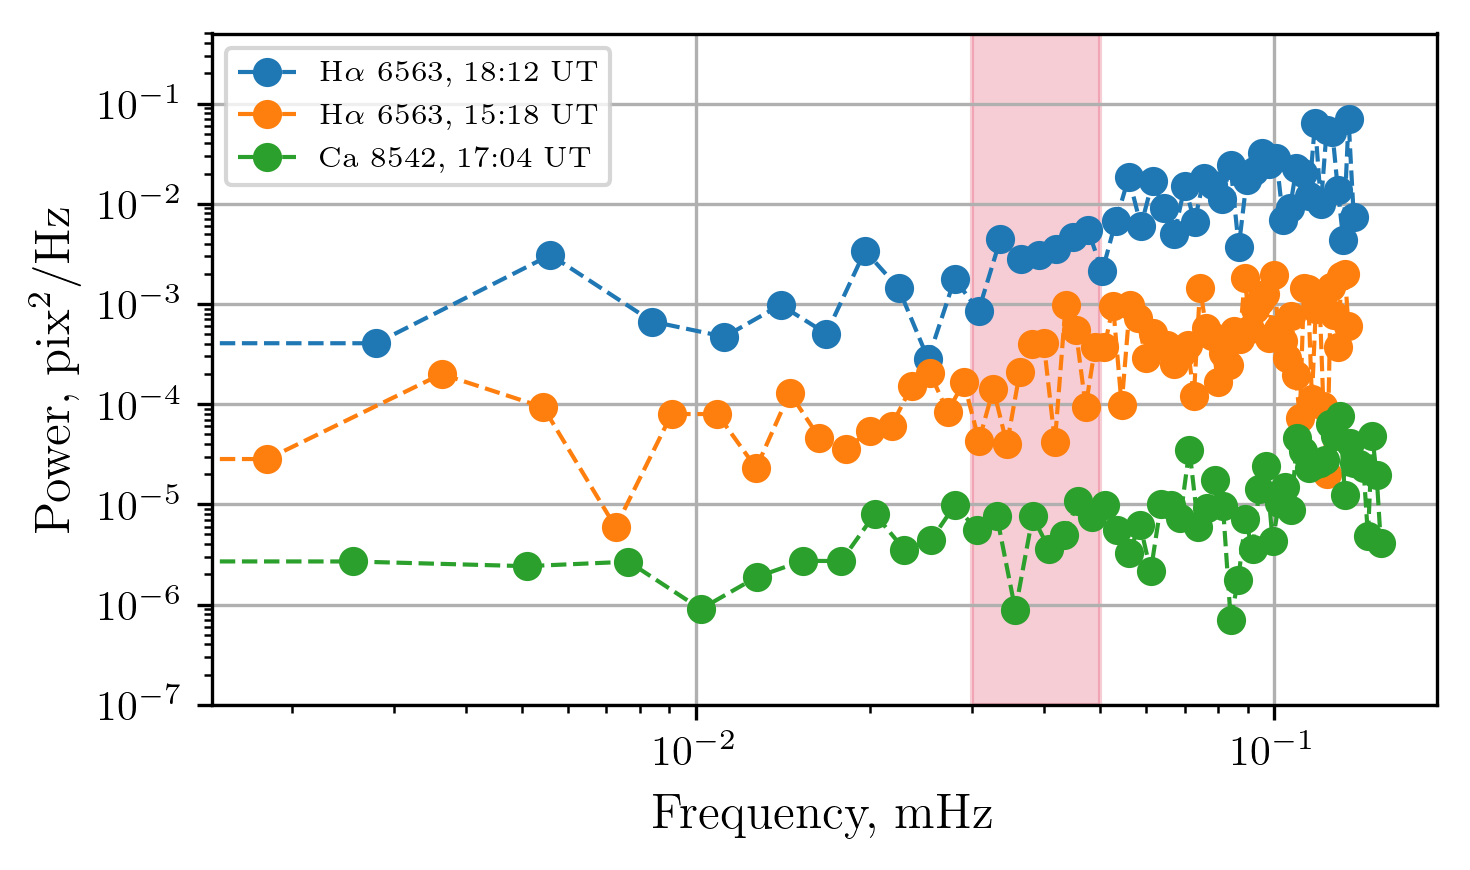

In [15]:
#Figure for the xy-off power displacement
plt.figure(dpi=300,figsize=(5,3))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fontsize_axis  = 12
fontsize_ticks = 7

ylim_low = 1e-7
ylim_up  = .8

fill_range_low  = 30e-3
fill_range_high = 50e-3

power_6563_181227_name = IBIS_data_dir + 'power_6563.ser_181227.even.sav'
power_6563_151857_name = IBIS_data_dir + 'power_6563.ser_151857.even.sav'
power_8542_170444_name = IBIS_data_dir + 'power_8542.ser_170444.even.sav'

power_6563_181227  = io.readsav(power_6563_181227_name,python_dict=True) 
power_6563_151857  = io.readsav(power_6563_151857_name,python_dict=True) 
power_8542_170444  = io.readsav(power_8542_170444_name,python_dict=True)

frequency_181227   = power_6563_181227['freq1']/.494*.137
frequency_151857   = power_6563_151857['freq1']/.499*.135
frequency_170444   = power_8542_170444['freq1']/.16*.1529
print(frequency_181227)
print(frequency_151857)
print(frequency_170444)
total_power_181227 = np.sqrt(power_6563_181227['power_x']**2+power_6563_181227['power_y']**2)
total_power_151857 = np.sqrt(power_6563_151857['power_x']**2+power_6563_151857['power_y']**2)
total_power_170444 = np.sqrt(power_8542_170444['power_x']**2+power_8542_170444['power_y']**2)

fill_points = np.linspace(fill_range_low,fill_range_high,num=100)

plt.fill_between(fill_points,ylim_low,ylim_up,color='crimson',alpha=0.21)
plot_power_spectra(total_power_181227*7,frequency_181227,'H$\\alpha$ 6563, 18:12 UT')
plot_power_spectra(total_power_151857*2,frequency_151857,'H$\\alpha$ 6563, 15:18 UT')
plot_power_spectra(total_power_170444/7,frequency_170444,'Ca 8542, 17:04 UT')
plt.legend(fontsize=fontsize_ticks)
plt.ylabel('Power, pix$^{2}$/Hz')
plt.tight_layout()
plt.ylim(1e-7,.5)
plt.savefig(dir_fig+'Power_xyoff_center_image.png')
plt.show()

In [6]:
#Figure for the MFGS seeing affected power 
image_seq_ca_8542_wl = fits.open(IBIS_data_dir+'nb.8542.ser_141344.destr.23Apr2017.target1.all.even.fits')
image_seq_ha_6563_wl = fits.open(IBIS_data_dir+'nb.6563.ser_141807.destr.23Apr2017.target1.all.even.fits')
a = image_seq_ca_8542_wl[0].data[:,21,:,:]
b = image_seq_ha_6563_wl[0].data[:,21,:,:]
a.shape[2]
b.shape[2]

1000

In [7]:
mfgs_ca     = np.zeros(a.shape[0])
mfgs_ha     = np.zeros(b.shape[0])
mfgs_kernel = 7
for i in range(0,a.shape[0]):
    mfgs_ca[i] = mfgs(a[i,:,:],mfgs_kernel)
for i in range(0,b.shape[0]):
    mfgs_ha[i] = mfgs(b[i,:,:],mfgs_kernel)

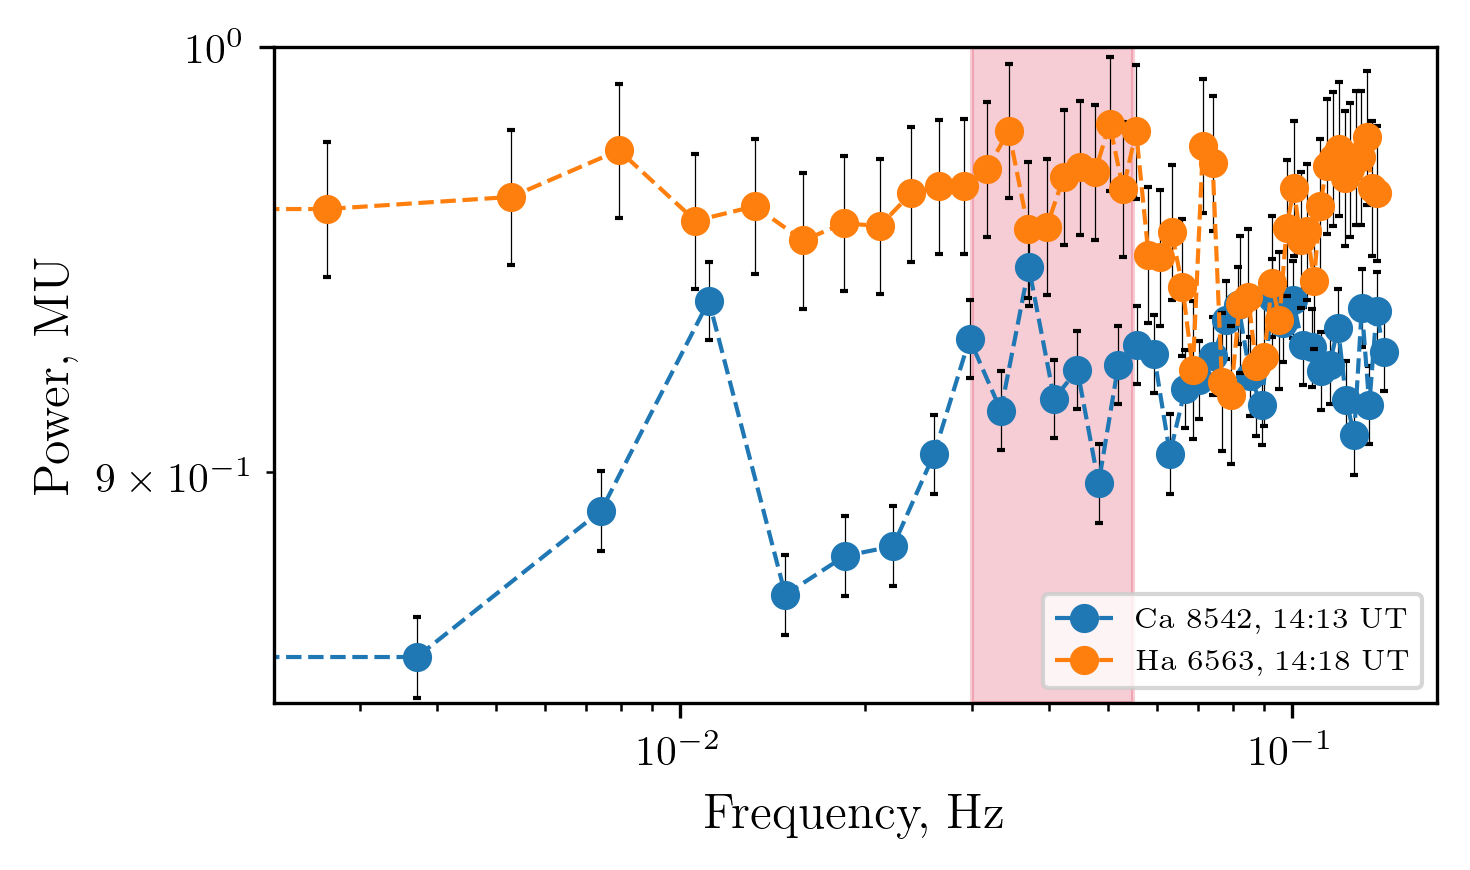

In [8]:
cadence_ca_8542_141344 = 3.5
cadence_ha_6563_141807 = 3.6

mfgs_ca_ps, mfgs_ps_ca_freqs = power_spec(mfgs_ca,cadence_ca_8542_141344)
mfgs_ha_ps, mfgs_ps_ha_freqs = power_spec(mfgs_ha,cadence_ha_6563_141807)
plt.figure(dpi=300,figsize=(5,3))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fontsize_axis  = 12
fontsize_ticks = 7

ylim_low = 8.5e-1
ylim_up  = 1e-0

fill_range_low  = 30e-3
fill_range_high = 55e-3
fill_points = np.linspace(fill_range_low,fill_range_high,num=100)

plt.fill_between(fill_points,ylim_low,ylim_up,color='crimson',alpha=0.21)
plot_power_spectra(mfgs_ca_ps,mfgs_ps_ca_freqs,'Ca 8542, 14:13 UT')
plot_power_spectra(mfgs_ha_ps,mfgs_ps_ha_freqs,'Ha 6563, 14:18 UT')
plt.legend(fontsize=fontsize_ticks)
plt.ylim(ylim_low,ylim_up)
#plt.xlim(2e-3,1e-1)
plt.tight_layout()
plt.savefig(dir_fig+'Power_MFGS.png')
plt.show()

(51, 1000, 1000)


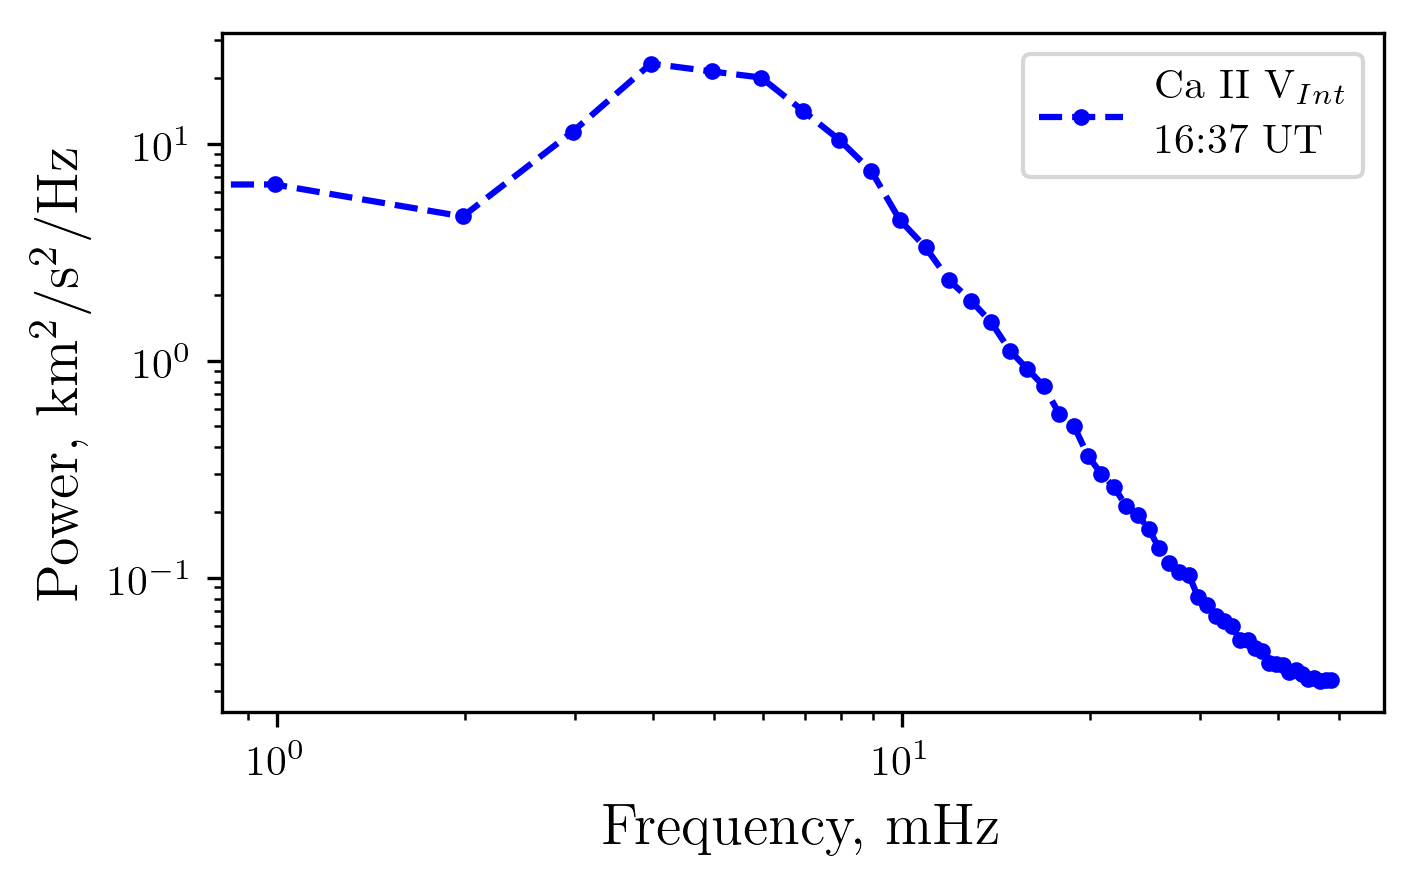

In [35]:
data_file = 'fft.el.lc.23Apr2017.target2.all.8542.ser_163718.sav'
power_8542_163718  = io.readsav(IBIS_data_dir+data_file,python_dict=True)

x1 = 400
y1 = 400

plt.figure(dpi=300,figsize=(5,3))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fontsize_axis  = 14
fontsize_ticks = 7


freq  = power_8542_163718['freq1']
power = power_8542_163718['fft_data']
print(power.shape)

ca_factor = 1605/(freq[1]-freq[0])/10
plt.plot(freq[0:50]*1e3,ca_factor*np.mean(np.mean(
    power[0:50,100:300,300:700],axis=1),axis=1),'b.--',label='Ca II V$_{Int}$ \n 16:37 UT')
#plt.plot(freq[0:50],ca_factor*np.mean(np.mean(
#    power[0:50,x1:(-1*x1),y1:(-1*y1)],axis=1),axis=1),'b.--',label='Ca II 16:37 UT')
plt.savefig(dir_fig+'Average spectrum.png')
plt.xlabel('Frequency, mHz',fontsize=fontsize_axis)
plt.ylabel('Power, km$^2$/s$^2$/Hz',fontsize=fontsize_axis)
plt.legend()
plt.xscale('log')
plt.yscale('log')

plt.show()